In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import precision_recall_curve
import webbrowser

In [42]:
np.random.seed(40)
td = pd.read_csv('sample_nan.csv')
#td

In [43]:
# Remove year and Month and Label
df =  td[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL']]

In [44]:
#Shuffle the dataset and apply interpolate method

df = df.sample(frac=1).reset_index(drop=True)
nedf = df.interpolate(method='cubic', axis=0).ffill().bfill()
nedf = nedf.astype("float")

In [45]:
#givving labels

ssc = np.array(nedf['SSC'])
sst = np.array(nedf['SST'])
fc = np.array(nedf['TOTALOIL'])
lab = []

for i in range(len(ssc)):
    if ssc[i]>0.2 and sst[i]>25.0 and fc[i]>10000:
        lab.append("PFZ")
    else:
        lab.append("NPFZ")

label = pd.DataFrame(lab, columns=['label'])
dataset = pd.concat([nedf,label],axis=1)


df1 = dataset

df1['label']=df1['label'].map({'PFZ':1,'NPFZ':0})

In [46]:
df2=df1.drop(['TC'],axis=1)
X = df2[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TOTALOIL']]

Y = df2[['label']]

#print("\t",Y)

In [47]:
#preprocessing....
from sklearn import preprocessing
#X_norm = preprocessing.normalize(X, norm='l2')   x[test_ids[:-10]]

X_norm = X.values
print(X_norm)


#y = np.squeeze(np.array(Y).reshape(1,-1))
y = Y.values
print(y)

#print("\t",y)

[[2.86033333e+01 2.20000000e-01 2.74071739e+01 7.39931818e+01
  1.01115378e+03 5.60471110e+04]
 [2.99385714e+01 1.60000000e-01 2.97726000e+01 7.79980000e+01
  1.00967760e+03 4.39340980e+04]
 [2.83730952e+01 2.30000000e-01 2.75458139e+01 7.49658537e+01
  1.01345432e+03 6.09036430e+04]
 [2.74924390e+01 1.40000000e-01 2.76102273e+01 8.34190476e+01
  1.00949364e+03 2.96855100e+03]
 [2.86595349e+01 2.40000000e-01 2.79270213e+01 7.60673913e+01
  1.01338625e+03 4.81317250e+04]
 [3.07493617e+01 2.40000000e-01 3.02920000e+01 7.75000000e+01
  1.00828960e+03 1.61862590e+04]
 [2.84648837e+01 1.80000000e-01 2.78791304e+01 7.78022222e+01
  1.01095022e+03 3.98624260e+04]
 [2.83920000e+01 1.20000000e-01 2.74588889e+01 7.45244444e+01
  1.00936864e+03 7.19068250e+04]
 [2.93590698e+01 1.80000000e-01 2.89225000e+01 7.63595745e+01
  1.01228042e+03 3.34007030e+04]
 [2.94859091e+01 2.20000000e-01 2.88890909e+01 7.69840909e+01
  1.00968023e+03 4.30652110e+04]
 [2.92842857e+01 2.40000000e-01 2.83980851e+01 7.8

[0.12923794 0.47263029 0.07196885 0.04968069 0.09653147 0.17995075]


C:\Users\afeed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


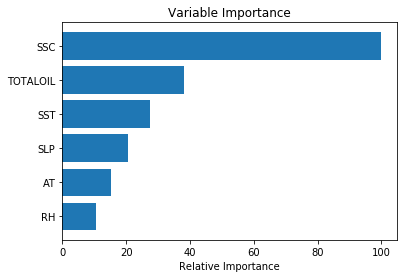

In [48]:
#feature importance graph
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_norm,y)
feature_importance=model.feature_importances_
print(model.feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .8
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
############################################################################################################
#taking random indices to split the dataset into train and test
test_ids = np.random.permutation(len(X_norm))
test_ids=test_ids.tolist()
test_ids.sort()
print(np.asarray(test_ids))

#splitting data and labels into train and test
#keeping last 10 entries for testing, rest for training

x_train = X_norm[test_ids[:-10]]

#reading the test file from test.csv
tdt = pd.read_csv('test.csv')
dft =  tdt[['SST', 'SSC', 'AT', 'RH', 'SLP',  'TOTALOIL']]




#x_test = X_norm[test_ids[-10:]]
print("xtest \t \t \t ",dft.values)
x_test=dft.values
y_train = y[test_ids[:-10]]

y_test = y[test_ids[-3:]] #use this only to find accuracy which are labels 1,0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
xtest 	 	 	  [[2.86033333e+01 2.20000000e-01 2.74071739e+01 7.39931818e+01
  1.01115378e+03 5.60471110e+04]
 [2.76448837e+01 1.50000000e-01 2.75291304e+01 8.19088889e+01
  1.00796822e+03 1.03641510e+04]
 [2.92732558e+01 2.40000000e-01 2.82256522e+01 7.44717391e+01
  1.01151848e+03 7.55464360e+04]]


In [50]:
#classifying using decision tree
clf = tree.DecisionTreeClassifier()

#training (fitting) the classifier with the training set
clf.fit(x_train, y_train)

#predictions on the test dataset
pred = clf.predict(x_test)

pred=pred.tolist()
print (pred) #predicted labels i.e 1 for pfz otherwise no

#now plotting only those places that were pfz

[1, 0, 1]


In [51]:
import folium
# Make a data frame with dots to show on the map
# data = pd.DataFrame({
#     'name': [],
#     'lat': [],
#     'lon': []
#
# })

dftmap =  tdt[['place','lat','lon']]
dftmap=dftmap.values.tolist()
#print(dftmap)
ind=0
maploc=[]
for i in dftmap:

    if pred[ind]==1:
        maploc.append(i)
    ind=ind+1

data=pd.DataFrame(maploc,columns=['name','lat','lon'],index=None)
print(data)

# Make an empty map
m = folium.Map(location=[11.25,75.78], tiles="stamentoner", zoom_start=6)

# I can add marker one by one on the map
for i in range(0, len(data)):
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']], popup=data.iloc[i]['name']).add_to(m)

# Save it as html

m.save('keralafish.html')
print("\n\t\t\tPLOTTING MAP....")
webbrowser.open('keralafish.html')

        name        lat        lon
0  kozhikode  11.258753  75.780411
1      pamba   9.380000  76.810000

			PLOTTING MAP....


True

# Accuracy

In [40]:
td = pd.read_csv('sample_nan.csv')
df =  td[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL']]
df = df.sample(frac=1).reset_index(drop=True)
nedf = df.interpolate(method='cubic', axis=0).ffill().bfill()
nedf = nedf.astype("float")
ssc = np.array(nedf['SSC'])
sst = np.array(nedf['SST'])
fc = np.array(nedf['TOTALOIL'])
lab = []
for i in range(len(ssc)):
    if ssc[i]>0.2 and sst[i]>25.0 and fc[i]>10000:
        lab.append("PFZ")
    else:
        lab.append("NPFZ")
label = pd.DataFrame(lab,columns=['label'])
dataset = pd.concat([nedf,label],axis=1)
df1 = dataset
df1['label']=df1['label'].map({'PFZ':0,'NPFZ':1})
df2=df1.drop(['TOTALOIL'],axis=1)
X = df2[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC']]
Y = df2[['label']]
from sklearn import preprocessing
X_norm = preprocessing.normalize(X, norm='l2')
y = np.squeeze(np.array(Y).reshape(1,-1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.33, random_state=40)
from sklearn import tree
clfD = tree.DecisionTreeClassifier()
clfD.fit(X_train,y_train)
result2 = clfD.predict(X_test)
print(accuracy_score(y_test,result2))
confusion_matrix(y_test,result2)

0.9375


array([[ 5,  0],
       [ 1, 10]], dtype=int64)